### Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions 

Insights to be drawn -
* Get all the cars and their types that do not qualify for clean alternative fuel vehicle
* Get all TESLA cars with the model year, and model type made in Bothell City.
* Get all the cars that have an electric range of more than 100, and were made after 2015
* Draw plots to show the distribution between city and electric vehicle type

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)



In [2]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

### Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [5]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         60551
Eligibility unknown as battery range has not been researched    53446
Not eligible due to low battery range                           16446
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [6]:
non_clean_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']
non_clean_cars_data = non_clean_cars[['Make', 'Model']]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars_data)

Cars and their types that do not qualify for clean alternative fuel vehicle:
          Make    Model
6         FORD   FUSION
7         AUDI     Q5 E
8         FORD    C-MAX
11       TESLA  MODEL Y
14        FORD    C-MAX
...        ...      ...
130437     BMW     530E
130438   TESLA  MODEL Y
130439  NISSAN     LEAF
130440   TESLA  MODEL Y
130442   TESLA  MODEL 3

[69892 rows x 2 columns]


### Get all TESLA cars with the model year, and model type made in Bothell City

In [7]:
df['City'].unique()

array(['Yakima', 'Poulsbo', 'Seattle', 'Lacey', 'Olympia', 'Tumwater',
       'Rochester', 'Bremerton', 'Bainbridge Island', 'Everett',
       'Leavenworth', 'Mill Creek', 'Snohomish', 'Mount Vernon',
       'Arlington', 'Lake Stevens', 'Burlington', 'Anacortes', 'Edmonds',
       'Bothell', 'Sultan', 'Spokane', 'Pullman', 'Yelm', 'Port Orchard',
       'Palouse', 'Monroe', 'Marysville', 'Mukilteo', 'Brier', 'Lynnwood',
       'Kettle Falls', 'Orondo', 'Selah', 'Oak Harbor', 'Clinton',
       'Cheney', 'Granite Falls', 'Renton', nan, 'Walla Walla',
       'Freeland', 'Kent', 'Redmond', 'Vancouver', 'Tukwila',
       'Federal Way', 'Kirkland', 'Bellevue', 'Battle Ground', 'Duvall',
       'Brush Prairie', 'Sammamish', 'Burien', 'Auburn', 'Bingen',
       'Camas', 'Issaquah', 'Shoreline', 'Covington', 'Woodinville',
       'Longview', 'Olalla', 'Normandy Park', 'Port Townsend',
       'North Bend', 'Seabeck', 'Medina', 'Maple Valley', 'Newcastle',
       'Des Moines', 'Ridgefield', 'Wash

In [8]:
tesla_cars_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]
tesla_cars_bothell_data = tesla_cars_bothell[['Model Year', 'Model']]
print("\nTESLA cars with the model year, and model type made in Bothell City:")
print(tesla_cars_bothell_data)


TESLA cars with the model year, and model type made in Bothell City:
        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]


## Get all the cars that have an electric range of more than 100, and were made after 2015

In [9]:
electric_cars_100_range = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
electric_cars_100_range_data = electric_cars_100_range[['Make', 'Model']]
print("\nCars with an electric range of more than 100 and made after 2015:")
print(electric_cars_100_range_data)


Cars with an electric range of more than 100 and made after 2015:
          Make    Model
0        TESLA  MODEL X
2        TESLA  MODEL 3
4        TESLA  MODEL S
12       TESLA  MODEL 3
13       TESLA  MODEL 3
...        ...      ...
130417   TESLA  MODEL Y
130428  NISSAN     LEAF
130432   TESLA  MODEL Y
130436   TESLA  MODEL 3
130441   TESLA  MODEL X

[34066 rows x 2 columns]


## Draw plots to show the distribution between city and electric vehicle type

In [10]:
df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            100156
Plug-in Hybrid Electric Vehicle (PHEV)     30287
Name: Electric Vehicle Type, dtype: int64

In [11]:
df['City'].value_counts()

Seattle        22894
Bellevue        6748
Redmond         4820
Vancouver       4652
Kirkland        4071
               ...  
Asheboro           1
Germantown         1
Saint Jacob        1
Watertown          1
Aurora             1
Name: City, Length: 656, dtype: int64

In [12]:
# Count the number of electric vehicles by city and electric vehicle type
city_vehicle_type_counts = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()
city_vehicle_type_counts

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
City,,
Aberdeen,73.0,42.0
Acme,3.0,4.0
Addy,1.0,1.0
Aiea,NaN,1.0
Airway Heights,10.0,8.0
...,...,...
Yacolt,19.0,13.0
Yakima,309.0,162.0
Yarrow Point,102.0,24.0


In [15]:
# Get the top N cities with the highest electric vehicle counts
top_cities = city_vehicle_type_counts.sum(axis=1).nlargest(10).index
vehicle_counts_top_cities = city_vehicle_type_counts.loc[top_cities]

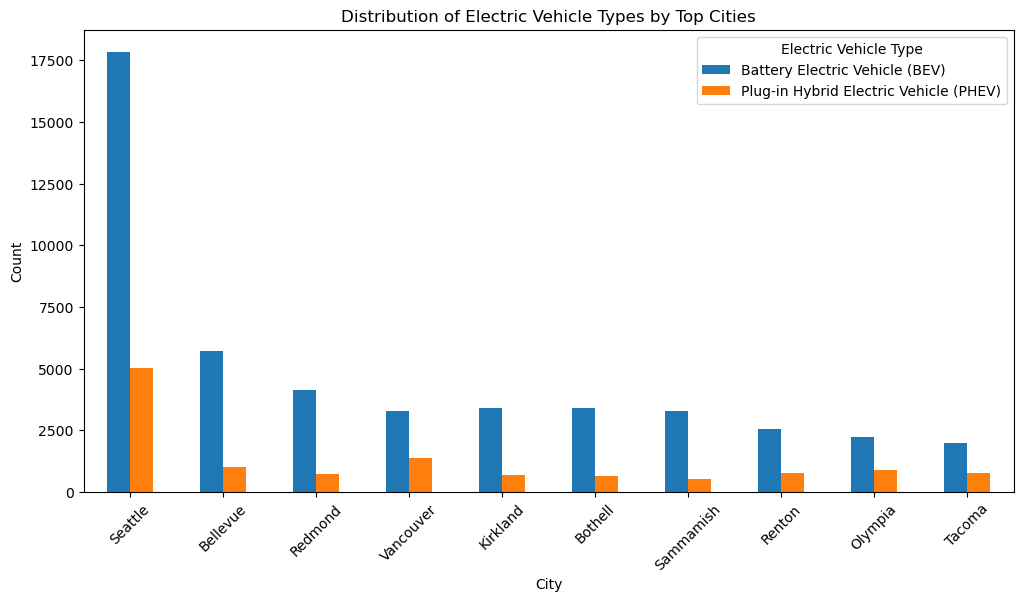

In [16]:
# Plot the distribution of electric vehicle types by city
vehicle_counts_top_cities.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Electric Vehicle Types by Top Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

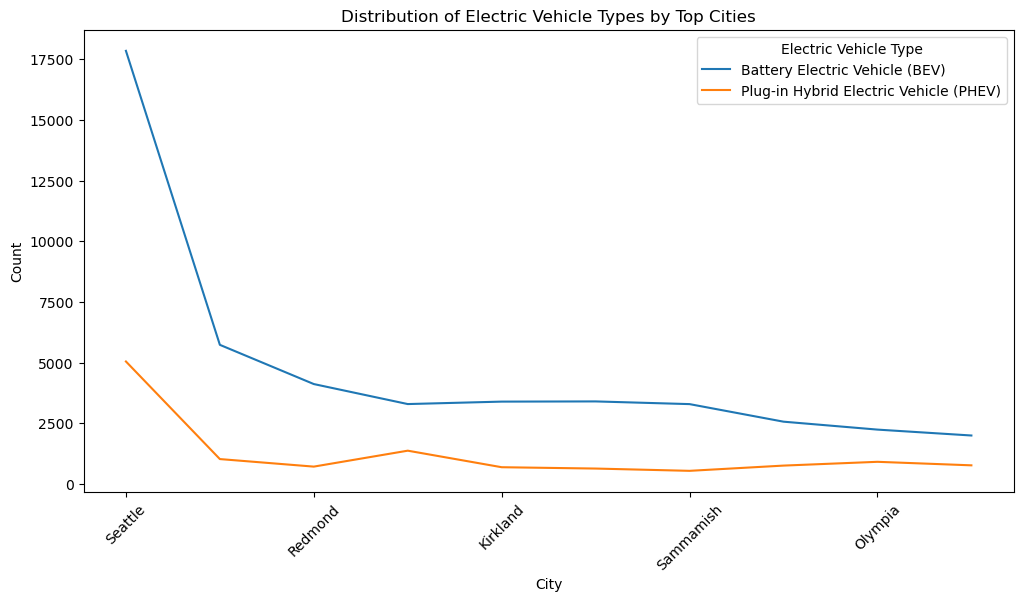

In [17]:
vehicle_counts_top_cities.plot(kind='line', figsize=(12, 6))
plt.title('Distribution of Electric Vehicle Types by Top Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [18]:
# Get the least N cities with the lowest electric vehicle counts
top_cities_small = city_vehicle_type_counts.sum(axis=1).nsmallest(10).index
vehicle_counts_top_cities_small = city_vehicle_type_counts.loc[top_cities_small]

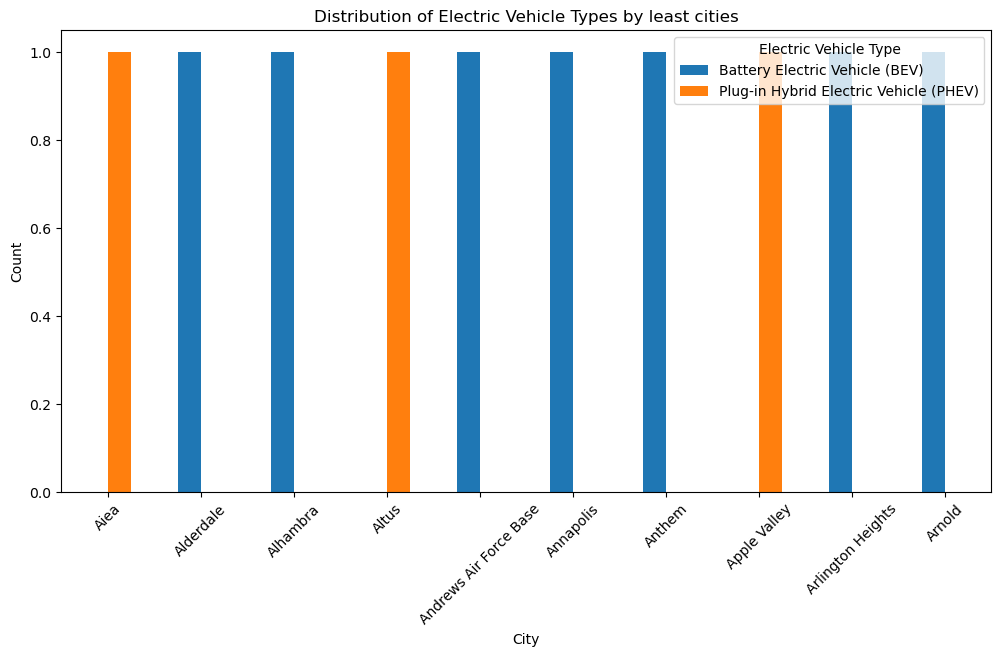

In [19]:
# Plot the distribution of electric vehicle types by city
vehicle_counts_top_cities_small.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Electric Vehicle Types by least cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()